<h1>한글 자연어 처리 기초</h1>

In [2]:
from konlpy.tag import Kkma
kkam = Kkma()

꼬꼬마 모듈을 사용하여 문장(sentences)분석을 한다.

In [3]:
#문장 분석
kkam.sentences("한국어 분석을 시작합니다 파이썬이 재미있다.")

['한국어 분석을 시작합니다', '파이 썬 이 재미있다.']

명사(nouns)를 분석한다.

In [4]:
#명사 분석 NNG
kkam.pos('한국어 분석을 시작 합니다 파이썬 이 재미있다')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작', 'NNG'),
 ('하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('파이', 'NNG'),
 ('썰', 'VV'),
 ('ㄴ', 'ETD'),
 ('이', 'MDT'),
 ('재미있', 'VA'),
 ('다', 'EFN')]

한나눔을 사용

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
kkam.nouns('한국어 분석을 시작 합니다 파이썬이 재미있다')

['한국어', '분석', '시작', '파이']

한나눔 VS 꼬꼬마

In [7]:
hannanum.morphs("한국어 분석을 시작 합니다 파이썬이 재미있따")

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '파이썬', '이', '재미있따']

In [8]:
#명사 뽑아 올때는 더 좋을듯.
hannanum.pos('한국어 분석을 시작 합니다 파이썬이 재미있다')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'P'),
 ('ㅂ니다', 'E'),
 ('파이썬', 'N'),
 ('이', 'J'),
 ('재미있', 'P'),
 ('다', 'E')]

<h1>워드 클라우드</h1>

자주 나타나는 단얼르 크게 보여줌 >>> 직관적으로 텍스트를 알리는데 유용하다.

In [9]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [10]:
#엘리스 소설 읽어오기
text = open('data/alice.txt').read()

#엘리스 그림 읽어오기
alice_mask = np.array(Image.open('data/alice_mask.png'))


#STOPWORDS 단어에서 제외
stopwords = set(STOPWORDS)
stopwords.add("said")

한글 폰트 만들기

In [11]:
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc("font", family='AppleGothic')
elif platform.system() == "Windows":
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("알수없는시스템입니다.")
    
%matplotlib inline

엘리스 이미지 출력

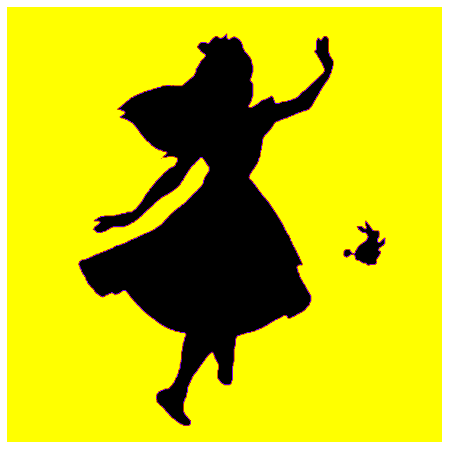

In [12]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gnuplot, interpolation='bilinear')
plt.axis('off')
plt.show()

문서파일 자체에서 단어를 카운트 하는 기능을 워드 클라우드가 제공함

이것으로 최빈단어를 찾는다


In [13]:
wc = WordCloud(background_color='White', max_words=2000, mask=alice_mask,
              stopwords=stopwords)

wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

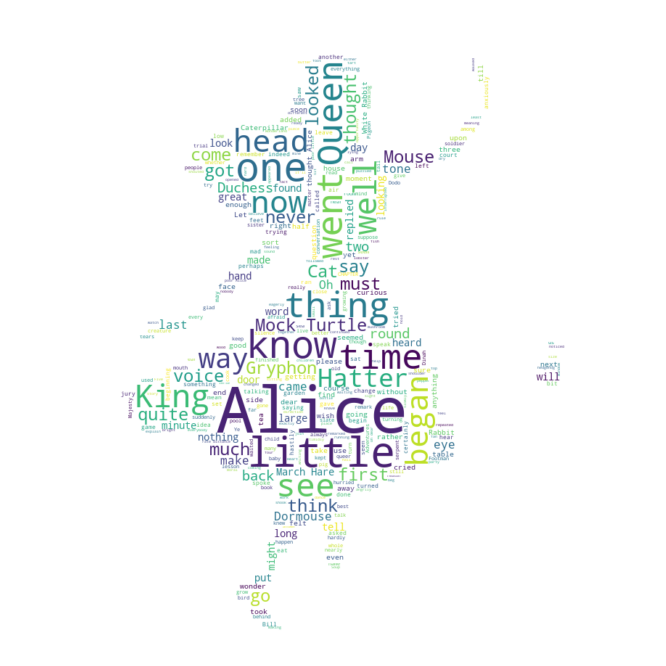

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

스타워즈 A NEW Hope 특수하게 처리할 단어를 처리한다.

In [15]:
text1 = open('data/a_new_hope.txt').read()

text1 = text1.replace("HAN", 'Han')
text1 = text1.replace("LUKE'S'", 'Luke')

starwars_mask = np.array(Image.open('data/stormtrooper_mask.png'))

찾지 않을 단어 변수 설정

In [16]:
stopwords1 = set(STOPWORDS)
stopwords1.add('int')
stopwords1.add('ext')

위드 클라우드

In [17]:
wc1 = WordCloud(max_words=1000, mask=starwars_mask, stopwords=stopwords1,
               margin=10, random_state=1).generate(text1)

default_colors = wc1.to_array()

앨리스와 다르게 색상을 전체적으로 회색으로 채우는 gray_color_func을 만듬

In [18]:
import random
def gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

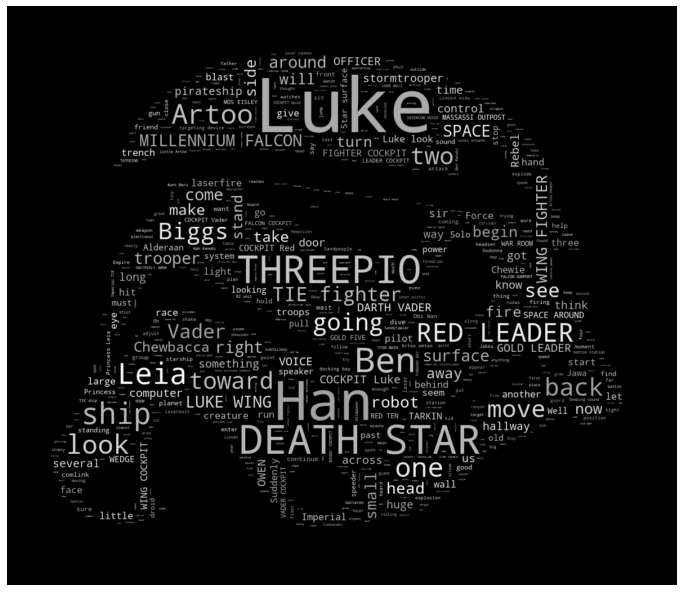

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc1.recolor(color_func=gray_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()

<h1>육아 휴직 관련 법안 분석</h1>

육아휴직 관련 법안 대한민국 국회 제 1809890호 의안의 법률문서 중 하나를 가지고 기초적인 분석

In [20]:
import matplotlib.pyplot as plt
import nltk

from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [21]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

한글 자연어 처리기 Okt분석기로 명사를 분석//Twitter 사용

In [22]:
from konlpy.tag import Okt, Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\Users\mrhi6\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [23]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890 호')

수집된 단어의 횟수와 고유한 횟수를 확인

In [24]:
print(len(ko.tokens))      #토큰 수를 반환(문서 길이)
print(len(set(ko.tokens))) #고유 토큰 수를 반환 (unique tokens)
ko.vocab()                 #주파수 분호를 반환(frequency distribution)

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

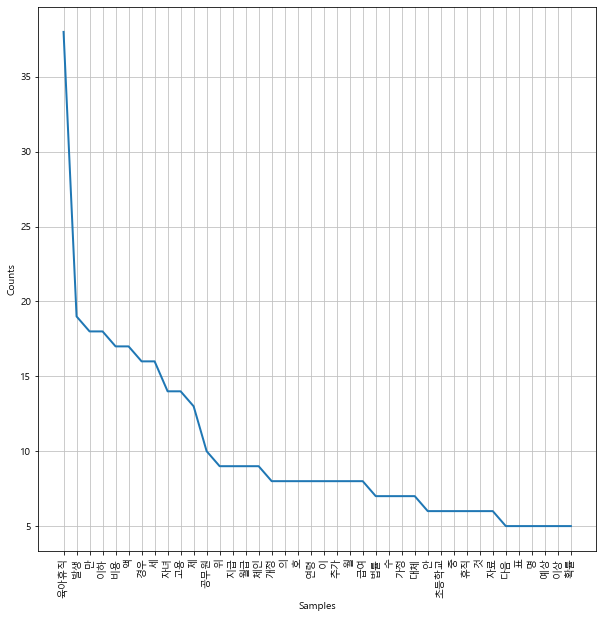

In [25]:
plt.figure(figsize=(10,10))
ko.plot(40)
plt.show()

많이 등장하는 순으로 plot 됨

의미 없는 단어가 있다 >>> 데이터 처리 필요

BUT,,, 영어와 달리 한글은 stopwords 가 쉽지 않음

>>>> <h1>case-by-case로 저장</h1>

<h1>###자주쓰는 부분###</h1>

In [26]:
#제거 단어 변수 지정
stop_words =['.', '(', ')', ',', "''", '%', '-', 'X', ').', 'x', '의', '자', '에', '안', '번',
            '호', '을', '이', '다', '만', '로', '가', '를']

#필요한 단어만 추출
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

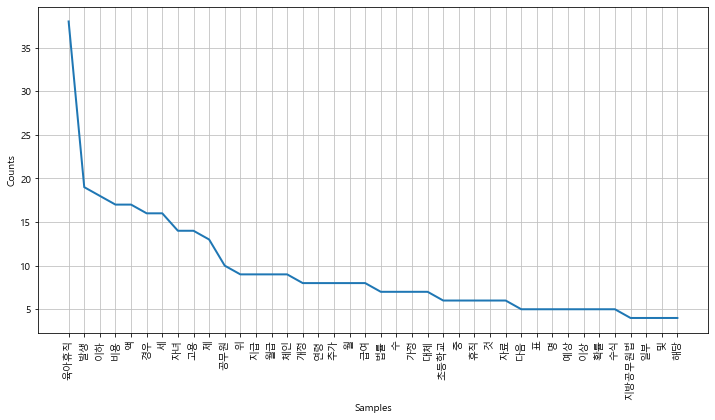

In [27]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890 호')

#그래프 사이즈
plt.figure(figsize=(12, 6))
#40 token 
ko.plot(40)
plt.show()

stop_words 변수에 의미 없는 단어를 추가 하면된다.

어떤 단어가 문서 내에서 몇 번 언급되었는지 확인 할 수 있다.

In [28]:
#초등학교 카운트
ko.count('초등학교')

6

원하는 단어의 문서 내 위치를 개략적으로 분량과 함께 알 수 있다.

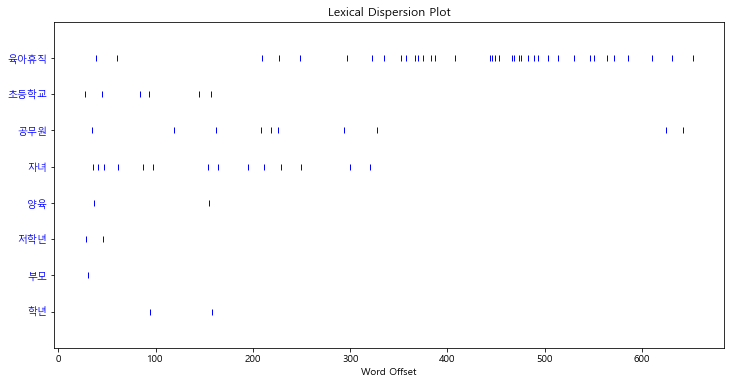

In [29]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원', '자녀', '양육', '저학년', '부모', '학년'])

원하는 단어의 주변부 단어 확인///어떤 언어가 사용되었는지 알 수 있다.

In [30]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


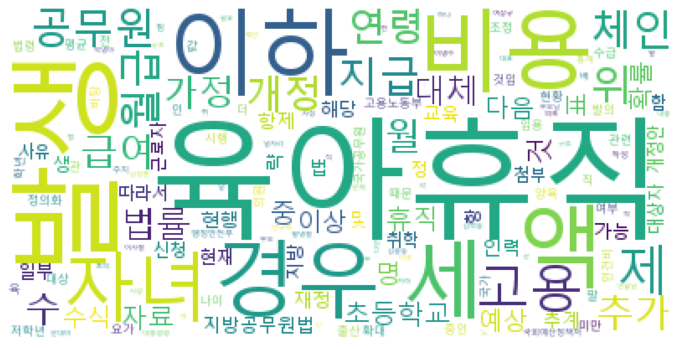

In [31]:
from wordcloud import WordCloud, STOPWORDS

data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h1>네이버 검색 결과를 이용한 학습</h1>

In [32]:
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc("font", family='AppleGothic')
elif platform.system() == "Windows":
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("알수없는시스템입니다.")
    
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

웹 브라우저 화면 주소창에 있는 주소 부분을 약간 수정해서 접근

In [33]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&kin_start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, 'html.parser')

tmp = soup.find_all("dl")

테스트로 한 페이지만 테스트 결과를 확인한다.

In [34]:
tmp_list = []

for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여친 선물 추천이요???ㅠ   6일 전   100일 됐는데 20대 중반이거든요 향수는 많아서 20만원대 까지 선물 추천 부탁드립니다.   답변 안녕하세요 공연기획사 파릇입니다:) 100일 선물로 여자친구분에게 드릴 선물을 고민하고 계시는군요~ 제가 몇가지 추천해드릴게요~ 먼저 레터링케이크를...    닉네임공연기획사 파릇   ',
 '  질문  여친선물로 이너퍼퓸 어때요   2020.07.28.   요즘 이너퍼퓸이 여자들 사이에서 인기 많다고해서 이너퍼퓸을 여친선물로 준비하려고... 추천받아보고 싶어서 질문 올립니다 여친선물 용으로 괜찮은 이너퍼퓸 좀 알려주세요   답변 여친선물로 추천드리는 이너퍼퓸은 포엘리에 제품이에요... 골랐어요 여친선물로 포엘리에 이너퍼퓸이 좋은 이유가 향도 다양하고 디자인이 예뻐요 여친선물 용도로 딱일...    닉네임zniv****   ',
 '  질문  여친선물로 뭘 줘야 할까요?   2020.05.21.   여친선물로 뭘 줘야 할까요?   답변 안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이 돌 수 있는 목걸이,반지...    닉네임Shine09749 블로그   ',
 '  질문  천여여친 선물 추   2020.06.21.   천여여친 선물 추   답변 쥬얼리여 ^^    닉네임으앙   ',
 '  질문  여친 선물이요 빨리ㅠㅠ   2020.06.29.   여친 선물이요 빨리ㅠㅠ 목걸이 시계 티셔츠 신발 반지 케이스 팔찌 이런거 말구요.. 커플템으로ㅠㅠ   답변 커플 속옷은 어떤가요 전 엄청 좋아 했었어요ㅎㅎ    닉네임필링   ',
 '  

테스트 결과//

네이버 지식인 창 // 1페이지 모든 항목 출력

결과에서 1만개 정도의 검색 결과를 가져온다.

In [35]:
from tqdm.notebook import tqdm

present_candi_text = []

for n in tqdm(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    
    soup = BeautifulSoup(response, "html.parser")
    
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

결과 출력///1만개

In [36]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여자친구선물추천 해주세요!급해요   2020.07.09.   같아서 여자친구선물 따로 알아보고 있거든요 어떤걸... 같은데 여자친구선물추천 부탁드려요 무선 이어폰 갖고... 비싼건 부담이구요 ㅜ 여자친구선물로 괜찮을거 없을까요?   답변 여자친구선물 고르는거 정말 어렵죠..ㅎㅎ 항상... 샀는데 여자친구선물로 딱일 거 같아서 알려드리고 가요... ㅎㅎ 여자친구선물로 좋을 거 같아 추천해요! 직접...    닉네임w2wi****   ',
 '  질문  여자친구선물 경락마사지 끊어주면 좋아할까요?   2020.08.31.   안녕하세요 기념일이라 여자친구선물로 좋아하는 거... 관리권으로 여자친구선물 해줄까 하는데 어떤가요?... aid=1570849234646858348 여자친구선물로 에스테틱 관리권...   답변 여자친구선물 경락마사지 끊어주면 엄청 좋아하실겁니다. 젊은분들이나 나이드신 분들도 꾸준히 경락 받고 있으니 여자친구선물 경락마사지...    닉네임식단 김선생   ',
 '  질문  여자친구선물 감동 줄 수 있는 걸로 추천해 주세요   2020.08.05.   여자친구선물로 감동 줄 수 있을 만한 것들에 뭐가... 본인 돈으로 안 끊을 거 잘 아니까 여자친구선물로 관리권... 요즘 인기 많은 것도 좋으니 여자친구선물 추천 부탁드려요!   답변 여자친구선물로 경락 관리권 정말 신선하네요~ 여자친구선물이나 아내선물로 남편, 남자친구들이 관리권 많이... 있어요 여자친구선물로 관리권 주신다면 여자친구분께서...    닉네임랑랑피트니스   ',
 '  질문  여자친구 선물로 감동적인게 뭐가 있을까요?   2020.04.07.   나중에 헤어진다고 해도 평생 저를

문자 갯수

In [37]:
len(present_candi_text)

1300

present_text변수에 저장///1만개

In [38]:
import nltk
from konlpy.tag import Okt

t = Twitter()

present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [39]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '여자친구',
 '선물',
 '추천',
 '해주세요',
 '!',
 '급해요',
 '2020.07',
 '.',
 '09',
 '.',
 '같아서',
 '여자친구',
 '선물',
 '따로',
 '알아보고',
 '있거든요',
 '어떤',
 '걸',
 '...',
 '같은데',
 '여자친구',
 '선물',
 '추천',
 '부탁드려요',
 '무선',
 '이어폰',
 '갖고',
 '...',
 '비싼건',
 '부담',
 '이구',
 '요',
 'ㅜ',
 '여자친구',
 '선물',
 '로',
 '괜찮을거',
 '없을까요',
 '?',
 '답변',
 '여자친구',
 '선물',
 '고르는거',
 '정말',
 '어렵죠',
 '..',
 'ㅎㅎ',
 '항상',
 '...',
 '샀는데',
 '여자친구',
 '선물',
 '로',
 '딱일',
 '거',
 '같아서',
 '알려',
 '드리고',
 '가요',
 '...',
 'ㅎㅎ',
 '여자친구',
 '선물',
 '로',
 '좋을',
 '거',
 '같아',
 '추천',
 '해요',
 '!',
 '직접',
 '...',
 '닉네임',
 'w',
 '2',
 'wi',
 '****',


많이 사용 되는 단어

In [40]:
ko = nltk.Text(tokens_ko, name="여자 친구 선물")
ko.vocab().most_common(100)

[('선물', 3898),
 ('.', 3277),
 ('여자친구', 3228),
 ('...', 1390),
 ('이', 1135),
 ('질문', 1085),
 ('답변', 1072),
 ('가', 1022),
 ('을', 1022),
 ('닉네임', 971),
 ('로', 944),
 ('추천', 932),
 ('대', 683),
 ('에', 682),
 ('?', 664),
 ('를', 663),
 ('는', 582),
 ('요', 557),
 ('****', 522),
 ('도', 518),
 (',', 515),
 ('단어', 500),
 ('여자', 499),
 ('20', 444),
 ('은', 434),
 ('검색', 417),
 ('하는', 392),
 ('의', 373),
 ('제', 363),
 ('좀', 357),
 ('때', 346),
 ('한', 345),
 ('생일', 333),
 ('..', 309),
 ('입력', 300),
 ('저', 299),
 ('뭐', 286),
 ('목걸이', 283),
 ('입니다', 261),
 ('!', 260),
 ('안녕하세요', 260),
 ('합니다', 258),
 ('30', 248),
 ('~', 238),
 ('들', 234),
 ('으로', 232),
 ('것', 232),
 ('포함', 210),
 ('1', 209),
 ('인데', 209),
 ('거', 204),
 ('하나', 202),
 ('화장품', 202),
 ('연관검색어', 200),
 ('중', 197),
 ('좋을까요', 196),
 ('향수', 193),
 ('하는데', 191),
 ('하고', 190),
 ('해서', 188),
 ('고민', 188),
 ('할', 187),
 ('해주세요', 186),
 ('생각', 182),
 ('너무', 181),
 ('어떤', 175),
 ('나', 175),
 ('분', 173),
 ('고', 168),
 ('좋은', 167),
 ('주', 161),
 ('에서', 1

필요없는 언어 데이터 처리

의미 없는 데이터 처리

In [41]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도', 
              '좋','1','는','로','으로','2','것','은','다',',','니다','대','들', 
              '2017','들','데','..','의','때','겠','고','게','네요','한','일','할', 
              '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ', 
              '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려', 
              '지','있','못','후','중','줄','6','과','어떤','기본','!!', 
              '단어','선물해','라고','중요한','합','가요','....','보이','네','무지',
             '****','추천','닉네임','권','인지','팩트','에서','입력','합니다','!','부탁드려요',
              '직접','저','분','2020.09','하는데','50~60','매장','포함','해서','해주세요','같아서','걸',
             '정말','끊어주면','안녕하세요','이라','해줄까','만','이나','고민','ysl', '.', '(', ')', ',',
              "''", '%', '-', 'X', ').', 'x', '의', '자', '에', '안', '번',
              '호', '을', '이', '다', '만', '로', '가', '를','요즘','잊을','없는','2019.11','2020.08','지금',
             '입니다','준비','같아요','정도','&','인터넷','주문','연관검색어','된','문서','삭제'] 

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 3898),
 ('여자친구', 3228),
 ('여자', 499),
 ('검색', 417),
 ('생일', 333),
 ('목걸이', 283),
 ('30', 248),
 ('화장품', 202),
 ('좋을까요', 196),
 ('향수', 193),
 ('하고', 190),
 ('생각', 182),
 ('너무', 181),
 ('나', 175),
 ('좋은', 167),
 ('많이', 153),
 ('가격', 149),
 ('랑', 143),
 ('적', 135),
 ('개', 131),
 ('사용', 128),
 ('에센스', 123),
 ('하세요', 121),
 ('곧', 121),
 ('해', 119),
 ('기', 118),
 ('/', 115),
 ('뷰티', 114),
 ('뭘', 113),
 ('스킨', 112),
 ('??', 111),
 ('여러', 110),
 ('하실', 109),
 ('꽃', 109),
 ('됩니다', 108),
 ('크리스마스', 108),
 ('본', 106),
 ('다시', 106),
 ('에게', 106),
 ('인', 105),
 ('운동', 105),
 ('살', 105),
 ('제외', 104),
 ('친구', 104),
 ('면', 104),
 ('이번', 104),
 ('정확히', 103),
 ('결과', 103),
 ('반드시', 101),
 ('구분', 101)]

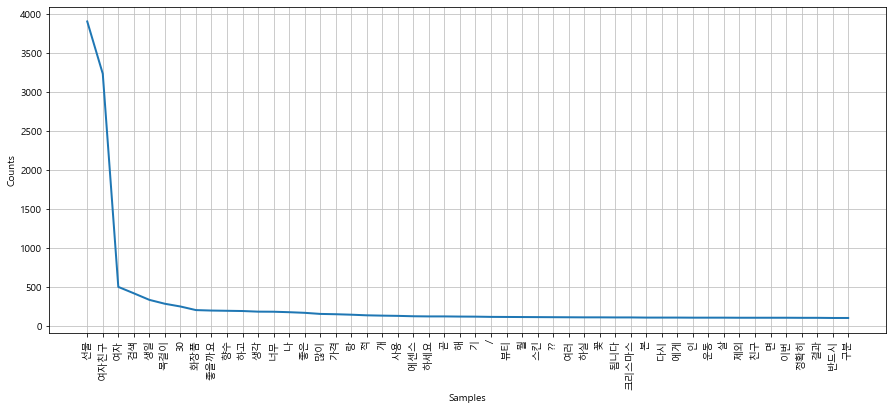

In [42]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

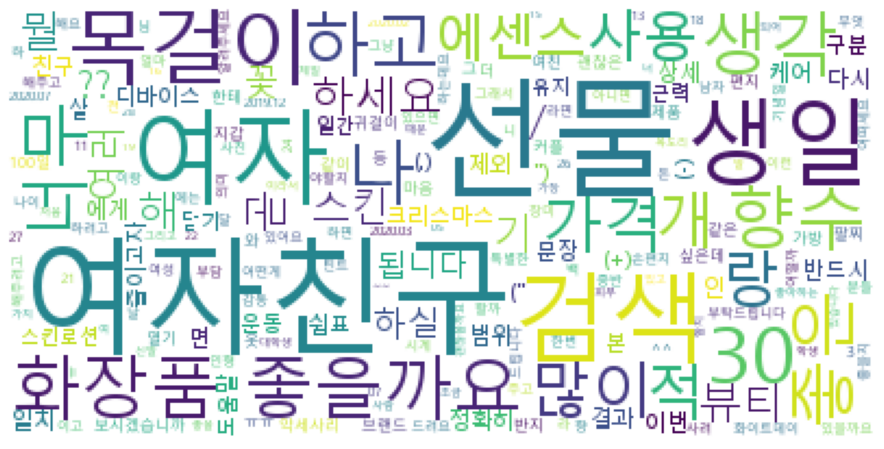

In [43]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [45]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.1, mask=mask,
                     background_color='white',
                     min_font_size=1,
                     max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

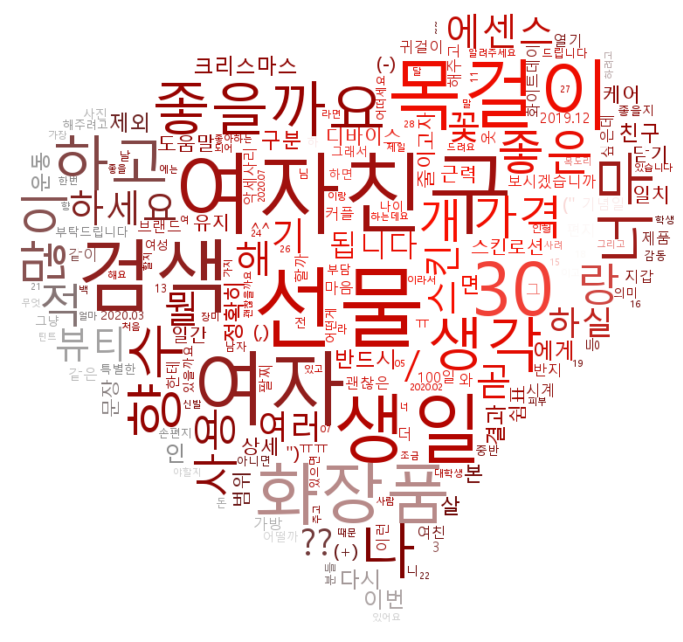

In [46]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()